In [1]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from os import listdir
from sklearn.preprocessing import StandardScaler
from os.path import isfile, join
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
image=[]

x_test =[]

y_train =[]
k=0
for i in range (1,12):
    if i==11:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/test/"
    else:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/training/s"+str(i)+"/"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for j in range(len(onlyfiles)):
        s=str(mypath)+str(onlyfiles[j])
        img= cv2.imread(s)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image.append(gray)
        ravel_img=np.ravel(image[k])  
        k +=1
        if i==11:
            x_test.append(ravel_img)
        else:            
            y_train.append(np.hstack((ravel_img,i)))
y_train=np.asarray(y_train)
Y_train=y_train[:,10304] 
X_train=y_train[:,0:10304]
X_test=np.asarray(x_test) 
print(Y_train)
print(X_train)
print(X_test)
X_train

[ 1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10]
[[ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 [ 63  53  35 ...  41  10  24]
 ...
 [106 105 106 ...  32  31  28]
 [111 110 111 ...  35  40  29]
 [105 104 104 ...  43  41  24]]
[[ 48  49  45 ...  47  46  46]
 [ 48  46  49 ...  31  31  36]
 [ 48  45  45 ...  28  37  29]
 ...
 [ 30  37  35 ...  26  27  32]
 [ 37  34  38 ... 135 143 133]
 [ 50  46  49 ...  33  33  41]]


array([[ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       [ 63,  53,  35, ...,  41,  10,  24],
       ...,
       [106, 105, 106, ...,  32,  31,  28],
       [111, 110, 111, ...,  35,  40,  29],
       [105, 104, 104, ...,  43,  41,  24]])

In [10]:
n_features = X_train.shape[1]
print("Total dataset size:")
print("n_samples: %d" % 60)
print("n_features: %d" % n_features)
print("n_classes: %d" % 10)

Total dataset size:
n_samples: 60
n_features: 10304
n_classes: 10


In [11]:

n_components = 50
h=112
w=92

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)




Extracting the top 50 eigenfaces from 60 faces
Projecting the input data on the eigenfaces orthonormal basis


Text(0, 0.5, 'Variance ratio')

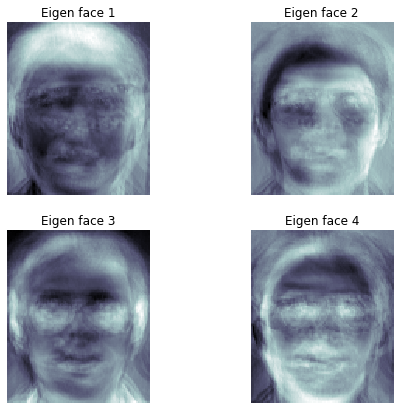

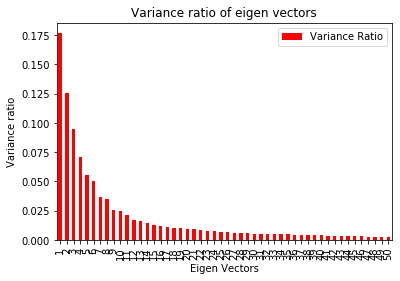

In [31]:

eigenfaces = pca.components_.reshape((n_components, 112, 92))
var= pca.explained_variance_ratio_

fig = plt.figure(figsize=(8, 7))
for i in range(4):  
    ax = fig.add_subplot(221+i)
    ax.axis('off')
    ax.title.set_text(str('Eigen face ')+str(i+1))
    ax.imshow(pca.components_[i].reshape(eigenfaces[0].shape), cmap=plt.cm.bone)
   
plotdata = pd.DataFrame( {"Variance Ratio": var},  index=np.arange(1,51))
plotdata.plot(kind="bar",color = "red")
plt.title("Variance ratio of eigen vectors")
plt.xlabel("Eigen Vectors")
plt.ylabel("Variance ratio")


In [14]:
Y_test=np.asarray([1,3,3,3,4,4,4,4,5,5,5,1,5,6,6,6,6,7,7,7,7,8,1,8,8,8,9,9,9,9,10,10,10,1,10,0,0,0,0,2,2,2,2,3])
print(Y_train)
print(Y_test)

[ 1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10]
[ 1  3  3  3  4  4  4  4  5  5  5  1  5  6  6  6  6  7  7  7  7  8  1  8
  8  8  9  9  9  9 10 10 10  1 10  0  0  0  0  2  2  2  2  3]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
neigh.fit(X_train_pca, Y_train)
print(neigh.predict(X_test_pca))
print("Accuracy in the case of PCA is ",accuracy_score(Y_test,neigh.predict(X_test_pca) )*100,'%')

[ 7  3  3  7  4  4  4  4  5  5  5  1  5  6  6  6  6  7  7  7  7  8  1  8
  8  8  4  5  5  2 10 10 10  2 10  7 10  7  5  2  2  2  2  3]
Accuracy is  75.0 %


In [2]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [3]:
image=[]

x_test =[]

y_train =[]
k=0
for i in range (1,12):
    if i==11:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/test/"
    else:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/training/s"+str(i)+"/"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for j in range(len(onlyfiles)):
        s=str(mypath)+str(onlyfiles[j])
        img= cv2.imread(s)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image.append(gray)
        ravel_img=np.ravel(image[k])  
        k +=1
        if i==11:
            x_test.append(ravel_img)
        else:            
            y_train.append(np.hstack((ravel_img,i)))
y_train=np.asarray(y_train)
Y_train=y_train[:,10304] 
X_train=y_train[:,0:10304]
X_test=np.asarray(x_test) 
print(Y_train)
print(X_train)
print(X_test)

[ 1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10]
[[ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 [ 63  53  35 ...  41  10  24]
 ...
 [106 105 106 ...  32  31  28]
 [111 110 111 ...  35  40  29]
 [105 104 104 ...  43  41  24]]
[[ 48  49  45 ...  47  46  46]
 [ 48  46  49 ...  31  31  36]
 [ 48  45  45 ...  28  37  29]
 ...
 [ 30  37  35 ...  26  27  32]
 [ 37  34  38 ... 135 143 133]
 [ 50  46  49 ...  33  33  41]]


In [4]:
n_features = X_train.shape[1]
print("Total dataset size:")
print("n_samples: %d" % 60)
print("n_features: %d" % n_features)
print("n_classes: %d" % 10)

Total dataset size:
n_samples: 60
n_features: 10304
n_classes: 10


In [5]:
X_train = StandardScaler().fit_transform(X_train)
X_test= StandardScaler().fit_transform(X_test)
lda = LDA(n_components =9)
lda.fit_transform(X_train,Y_train)
lda.transform(X_test)
prdt=lda.predict(X_test)
print(prdt)

[ 1  3  3  3  4  4  4  4  5  5  5  1  5  6  6  6  6  7  7  7  7  8  1  8
  8  8  9  9  9  4 10 10 10  1 10  5  3  7  8  2  2  2  2  3]


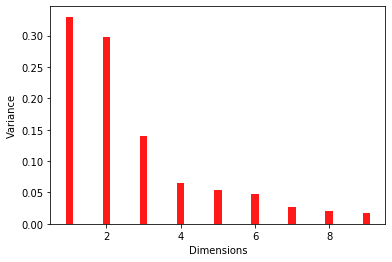

In [6]:
var= lda.explained_variance_ratio_
y= np.arange(1,len(var)+1)
plt.bar(y,var, align='center', alpha=0.9,width=0.2,color="red")
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()


In [21]:
Y_test=np.asarray([1,3,3,3,4,4,4,4,5,5,5,1,5,6,6,6,6,7,7,7,7,8,1,8,8,8,9,9,9,9,10,10,10,1,10,0,0,0,0,2,2,2,2,3])
print("Accuracy is in the case of LDA is ",accuracy_score(Y_test, prdt)*100,'%')

Accuracy is  88.63636363636364 %


In [8]:
from sklearn.metrics.pairwise import euclidean_distances
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score

In [9]:
image=[]

x_test =[]

y_train =[]
k=0
for i in range (1,12):
    if i==11:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/test/"
    else:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/training/s"+str(i)+"/"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for j in range(len(onlyfiles)):
        s=str(mypath)+str(onlyfiles[j])
        img= cv2.imread(s)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image.append(gray)
        ravel_img=np.ravel(image[k])  
        k +=1
        if i==11:
            x_test.append(ravel_img)
        else:            
            y_train.append(np.hstack((ravel_img,i)))
y_train=np.asarray(y_train)
Y_train=y_train[:,10304] 
X_train=y_train[:,0:10304]
X_test=np.asarray(x_test) 
print(Y_train)
print(X_train)
print(X_test)

[ 1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10]
[[ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 [ 63  53  35 ...  41  10  24]
 ...
 [106 105 106 ...  32  31  28]
 [111 110 111 ...  35  40  29]
 [105 104 104 ...  43  41  24]]
[[ 48  49  45 ...  47  46  46]
 [ 48  46  49 ...  31  31  36]
 [ 48  45  45 ...  28  37  29]
 ...
 [ 30  37  35 ...  26  27  32]
 [ 37  34  38 ... 135 143 133]
 [ 50  46  49 ...  33  33  41]]


In [12]:
 
mean=[]
for i in range(10):
    m=y_train[i*6:i*6+6,0:10304]
    for j in range(10304):
         mean.append(np.mean(m[:,j]))
         
mean=np.reshape(np.asarray(mean),(10,10304))    
 


V=[]
for i in range(len(X_test)):
    X=X_test[i,:]
    distance=[]
    for j in range(10):
        m=mean[j,:]
        d=euclidean_distances([m], [X])
        distance.append(d)
        
    v=1+distance.index(min(distance))
    V.append(v)

print(V)

[1, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 1, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 1, 8, 8, 8, 9, 9, 9, 4, 10, 10, 10, 1, 10, 5, 3, 7, 5, 2, 2, 2, 2, 3]


In [11]:
Y_test=np.asarray([1,3,3,3,4,4,4,4,5,5,5,1,5,6,6,6,6,7,7,7,7,8,1,8,8,8,9,9,9,9,10,10,10,1,10,0,0,0,0,2,2,2,2,3])

print("Accuracy in the case of correlation is is ",accuracy_score(Y_test, V)*100,'%')

Accuracy in the case of correlation is is  88.63636363636364 %
